In [1]:
import requests
from PIL import Image

In [2]:
subscription_key ='2b1ade5424844fe0826087f617215004'

In [3]:
assert subscription_key

In [4]:
face_api_url = 'https://20220223masa.cognitiveservices.azure.com/face/v1.0/detect'

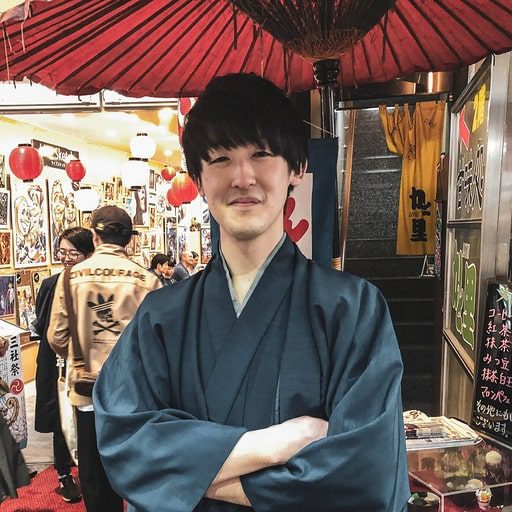

In [5]:
img = Image.open('sample02.jpg')
img

In [6]:
with open('sample02.jpg', 'rb') as f:
    binary_img = f.read()

In [7]:
# binary_img

In [8]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [9]:
res

<Response [200]>

In [10]:
result = res.json()
result

[{'faceId': '4a2285a6-73fb-4f9a-8d61-98cc42b72ea1',
  'faceRectangle': {'top': 130, 'left': 194, 'width': 97, 'height': 97},
  'faceAttributes': {'smile': 0.962,
   'headPose': {'pitch': -3.5, 'roll': -6.4, 'yaw': -1.9},
   'gender': 'male',
   'age': 26.0,
   'facialHair': {'moustache': 0.1, 'beard': 0.4, 'sideburns': 0.1},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.962,
    'neutral': 0.036,
    'sadness': 0.001,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.48},
   'noise': {'noiseLevel': 'low', 'value': 0.0},
   'makeup': {'eyeMakeup': True, 'lipMakeup': False},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.09,
    'invisible': False,
    'hairColor': [{'color': 'black', 'confidence': 1.0},
     {'color': 'gray', 'co

In [11]:
rect = result[0]['faceRectangle']
rect

{'top': 130, 'left': 194, 'width': 97, 'height': 97}

In [12]:
from PIL import ImageDraw

In [13]:
draw = ImageDraw.Draw(img)

In [14]:
# draw.line([(0,50), (200,50), (0,150), (200,150)], fill='red', width=5)
# img

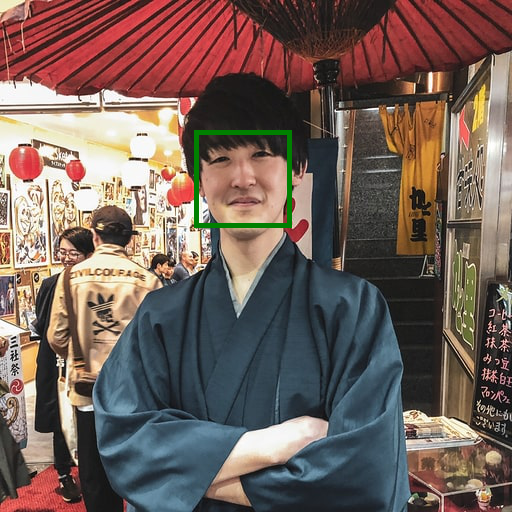

In [15]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'],rect['top']+rect['height'])], fill=None, outline='green', width=5)
img

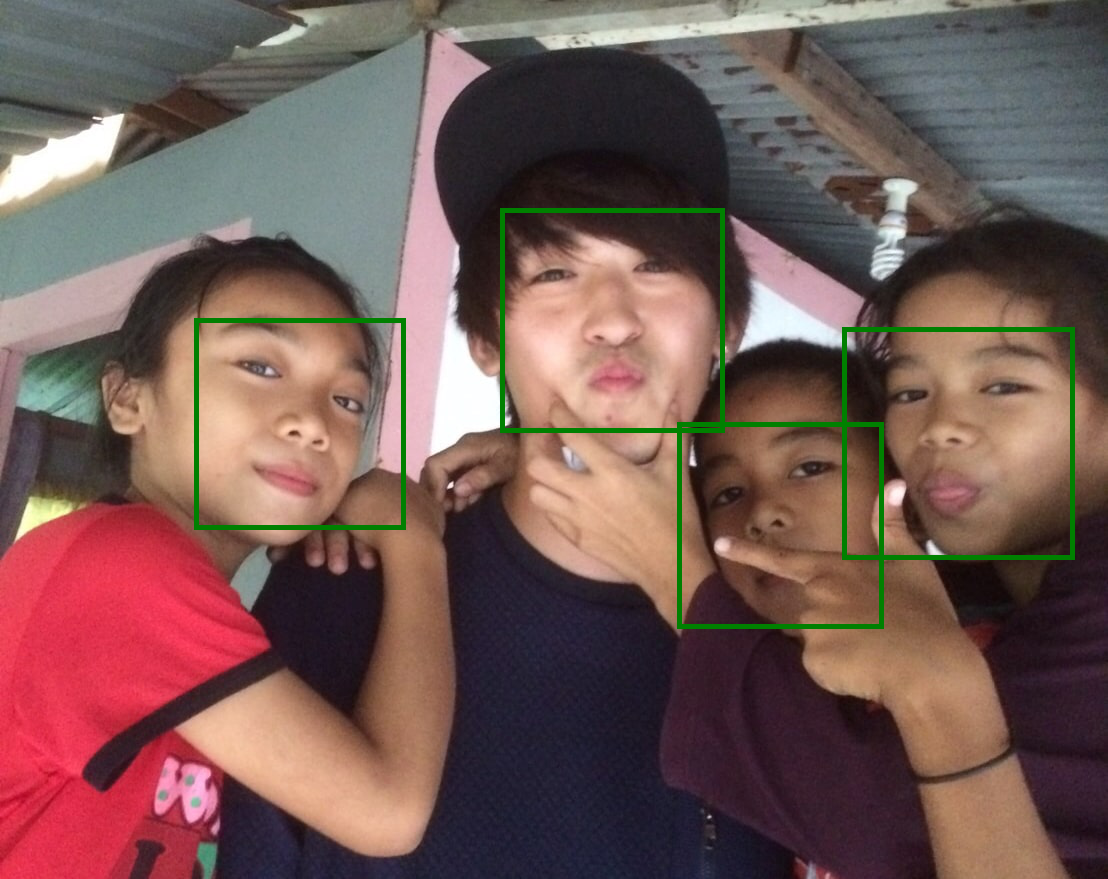

In [19]:
import requests
from PIL import Image
from PIL import ImageDraw
import io

subscription_key ='2b1ade5424844fe0826087f617215004'
assert subscription_key

face_api_url = 'https://20220223masa.cognitiveservices.azure.com/face/v1.0/detect'


img = Image.open('sample01.jpg')
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #banary取得
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

results = res.json()
for result in results:
    rect = result['faceRectangle']

    draw = ImageDraw.Draw(img)

    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'],rect['top']+rect['height'])], fill=None, outline='green', width=5)
img


In [ ]:
import io

In [ ]:
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #banary取得